Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'tseries' was built under R version 3.6.3"

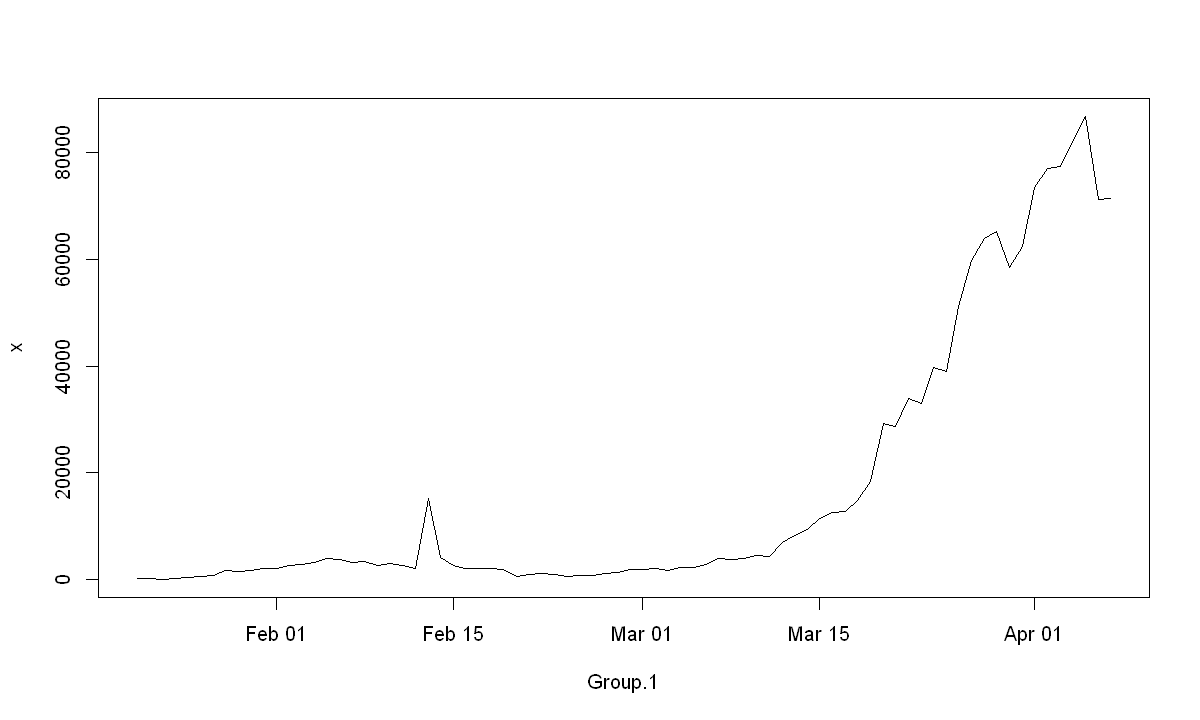

In [2]:
library("ggplot2")
library("readxl")
library("forecast")
library("tseries")
covid<-data.frame(read_excel("C:/Users/avakk/Documents/April7COVID-19.xlsx"))
options(repr.plot.width=10, repr.plot.height=6)
val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

total_cases_by_date<-aggregate(covid$cases,by=list(covid$dateRep),FUN=sum)
total_cases_by_date<-tail(total_cases_by_date,-21)

plot(total_cases_by_date,type="l")

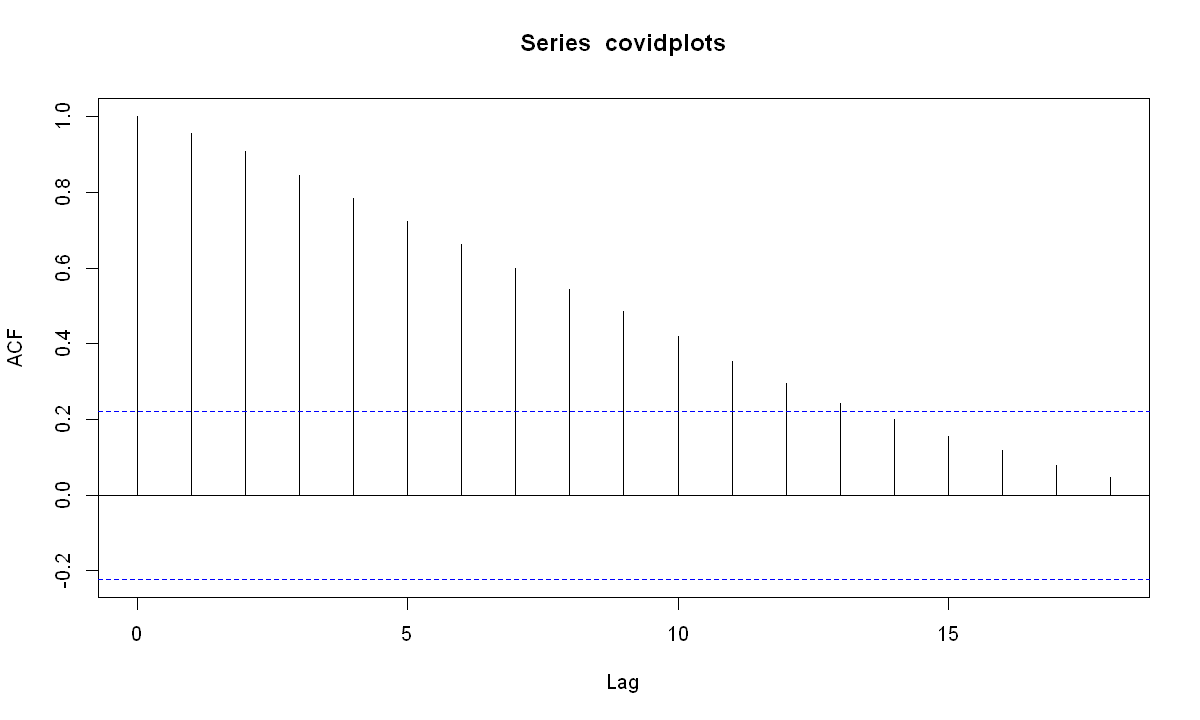

In [3]:
covidplots<-total_cases_by_date$x
acf(covidplots)

In [4]:
train<-head(covidplots,round(length(covidplots)*0.90))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)

param<-auto.arima(train)

plotfit<-arima(train,c(1,2,1))
plotfit


Call:
arima(x = train, order = c(1, 2, 1))

Coefficients:
          ar1      ma1
      -0.2261  -0.8730
s.e.   0.1373   0.0601

sigma^2 estimated as 10648948:  log likelihood = -647.57,  aic = 1301.13

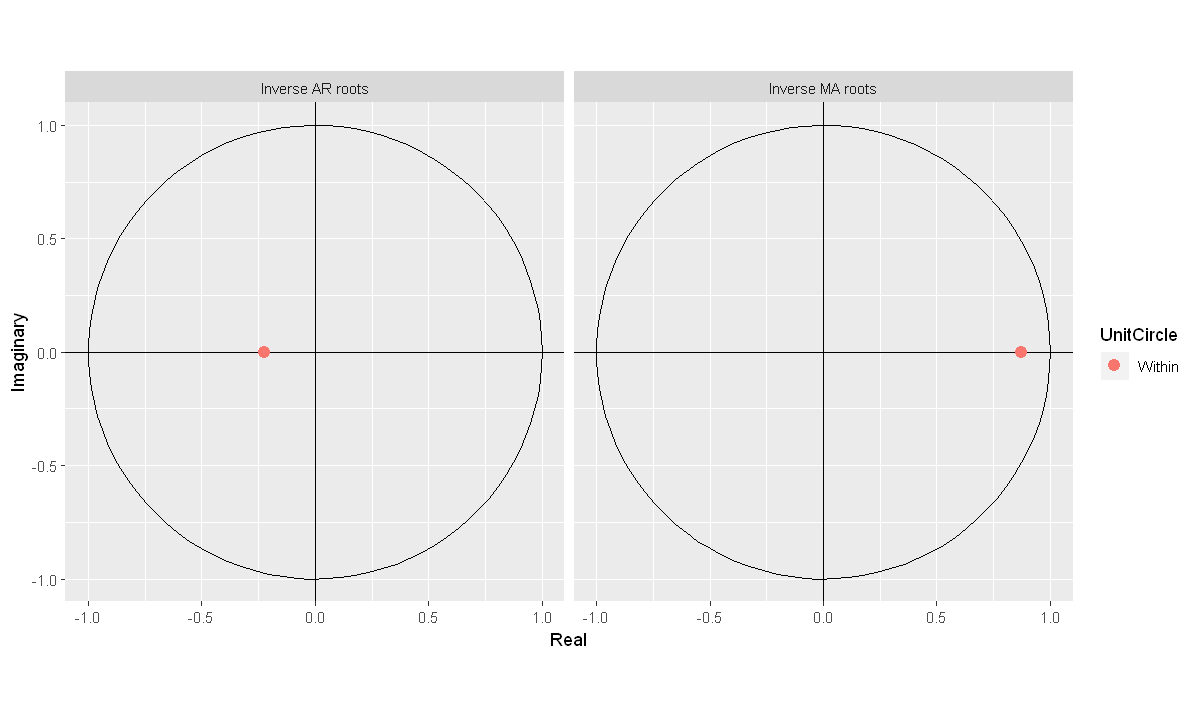

In [5]:
autoplot(plotfit)


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 10.227, df = 8, p-value = 0.2494

Model df: 2.   Total lags used: 10



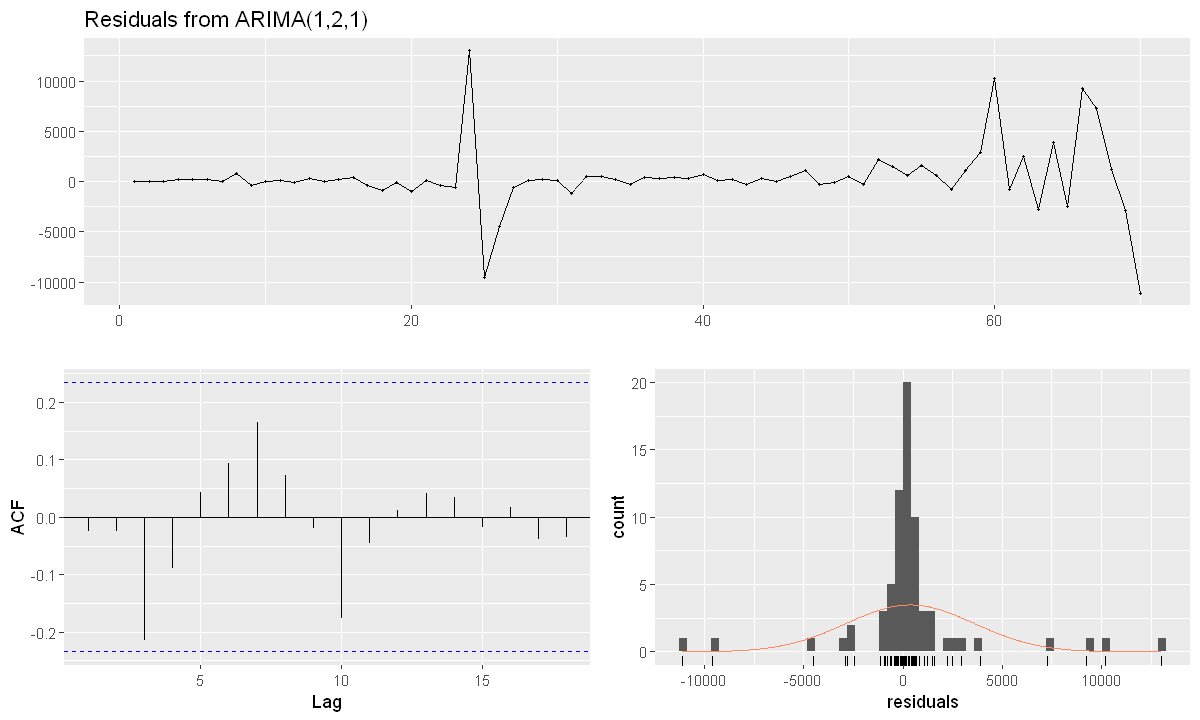

In [6]:
checkresiduals(plotfit)

p<-ts(total_cases_by_date$x)

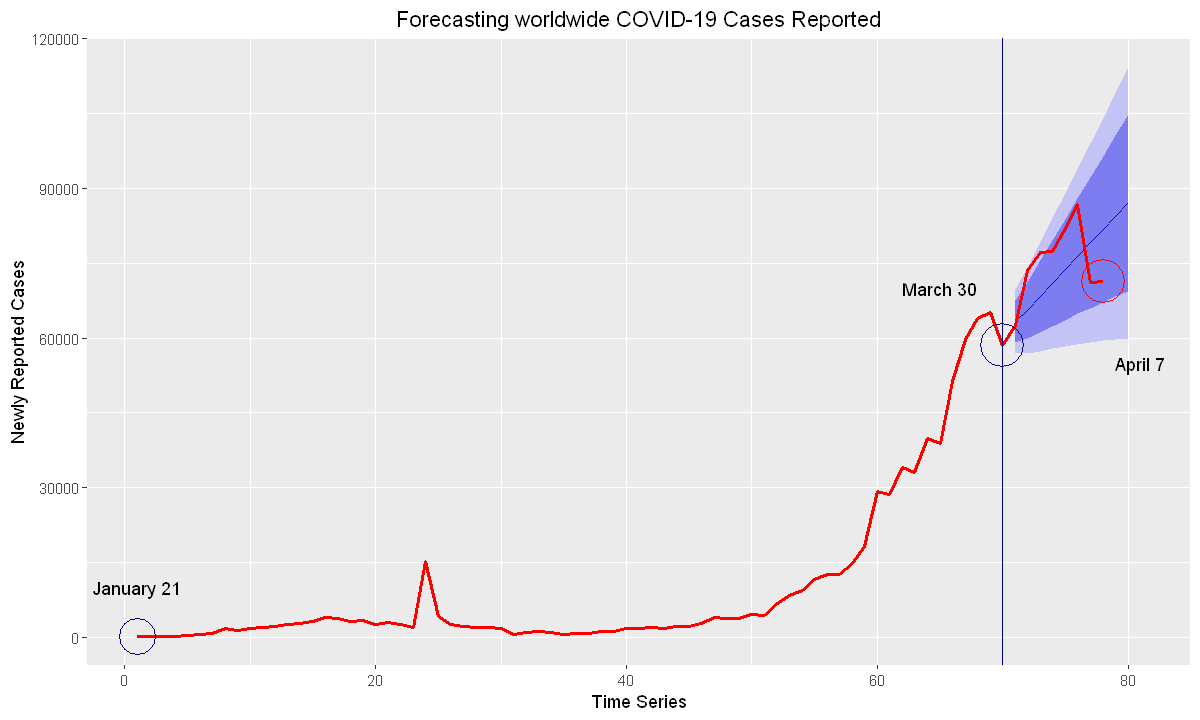

In [7]:
autoplot(forecast(plotfit,h=10))+autolayer(p,size=1.1,color="red")+
  ggtitle("Forecasting worldwide COVID-19 Cases Reported")+labs(y="Newly Reported Cases", x = "Time Series")+
  theme(plot.title = element_text(hjust = 0.5))+geom_vline(xintercept = 70,color="darkblue")+
  annotate(geom="text",x=65,y=70000,label="March 30")+
  annotate(geom="point", x=70,y=58487,size=12,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=1,y=10000,label="January 21")+
  annotate(geom="point", x=1,y=153,size=10,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=81,y=55000,label="April 7")+
  annotate(geom="point", x=78,y=71392,size=12,shape=21,fill="transparent",color="red")



In [8]:
f<-forecast(plotfit)

forecastvalues<-data.frame(forecast(plotfit))
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,2830.75,8105.08,7593.75,3.19655,9.917001
